<a href="https://colab.research.google.com/github/Warlord-K/PlantLeafIdentificationModel/blob/main/PlantLeafIdentificationbyYatharth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd

In [ ]:
#Load Dataset from Images Folder

from PIL import Image
images = []
image_labels = []
IMG_SIZE = (224,224)
categories = ["Pupescent bamboo","Chinese Horse Chestnut", "Chinese Redbud","True Indigo","Japanese Maple","Nanmu","Castor Aralia",
              "goldenrain tree","Chinese cinnamon","Anhui Barberry","Big-fruited Holly","Japanese cheesewood","wintersweet","camphortree",
              "Japan Arrowwood","sweet osmanthus","deodar","ginkgo, maidenhair tree","Crepe myrtle","oleander","yew plum pine","Japanese Flowering Cherry",
              "Glossy Privet","Chinese Toon","peach","Ford Woodlotus","trident maple","Beale's barberry","southern magnolia","Canadian poplar",
              "Chinese tulip tree","tangerine"
              ]
start_end_numbers = [[1001,1059],[1060,1122],[1123,1194],[1195,1267],[1268,1323],[1324,1385],[1386,1437],[1438,1496],[1497,1551],[1552,1616],
                     [2001,2050],[2051,2113],[2114,2165],[2166,2030],[2031,2090],[2191,2346],[2347,2423],[2424,2485],[2486,2546],[2547,2612],
                     [2616,2675],[3001,3055],[3056,3110],[3111,3175],[3176,3229],[3230,3281],[3282,3334],[3335,3389],[3390,3446],[3447,3510],
                     [3511,3563],[3566,3621]]

def resize_img(img):
    img = img/255
    img = tf.image.resize(img, IMG_SIZE)
    return img

for i,category in enumerate(categories):
    for j in range(start_end_numbers[i][0],start_end_numbers[i][1]+1):
        image_labels.append([0]*32)
        image_labels[-1][i] = 1
        #image_labels.append(i)
        images.append(resize_img(np.asarray(Image.open("/content/drive/MyDrive/Leaves/"+str(j)+".jpg"))))

In [ ]:
#Load Dataset from CSV file

df = pd.read_csv("https://drive.google.com/uc?export=download&id=1-2WfeJpS-kp4CQMZg8cQNftMhkd0jh9d") #Change This Link
images = []

df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1-5mnoMsoC_jURQAqZuMHJWqgrOWqiRP7")
labels = df1["labels"]
image_labels = []


for i in range(1942):
    images.append = df[i]
images = list(map(np.asarray,images))

for i in range(1942):
    images[i] = tf.reshape(images[i],(224,224,3))
    image_labels.append([0]*32)
    image_labels[-1][labels[i]] = 1

In [ ]:
image_labels = list(map(tf.constant,image_labels))
data = tf.data.Dataset.from_tensor_slices((images, image_labels)).shuffle(buffer_size=5000)
test = data.skip(1600)
train = data.take(1600)
train_batches = train.batch(32)
test_batches = test.batch(32)


In [ ]:
IMG_SHAPE = (224, 224, 3)

conv_layer = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
conv_layer.trainable = False

pooling_layer = tf.keras.layers.GlobalAveragePooling2D()
output_layer = tf.keras.layers.Dense(32)
model = tf.keras.Sequential([
  conv_layer,
  pooling_layer,
  output_layer
])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 32)                40992     
                                                                 
Total params: 2,298,976
Trainable params: 40,992
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_batches,epochs=8)
loss0,accuracy0 = model.evaluate(test_batches)

Epoch 1/8
50/50 [==============================] - 53s 1s/step - loss: 1.8147 - accuracy: 0.7500
Epoch 2/8
50/50 [==============================] - 42s 838ms/step - loss: 0.3669 - accuracy: 0.9225
Epoch 3/8
50/50 [==============================] - 42s 833ms/step - loss: 0.3540 - accuracy: 0.9319
Epoch 4/8
50/50 [==============================] - 42s 838ms/step - loss: 0.3076 - accuracy: 0.9413
Epoch 5/8
50/50 [==============================] - 42s 838ms/step - loss: 0.2430 - accuracy: 0.9531
Epoch 6/8
50/50 [==============================] - 42s 835ms/step - loss: 0.2836 - accuracy: 0.9525
Epoch 7/8
50/50 [==============================] - 42s 832ms/step - loss: 0.1933 - accuracy: 0.9706
Epoch 8/8
11/11 [==============================] - 12s 828ms/step - loss: 0.2988 - accuracy: 0.9591


[19, 22, -5, -4, 5, 27, -7, 0, 31, 13, -5, 19, 9, -14, 16, 6, 7, -3, -15, 52, 25, 10, 14, 19, 26, 29, 7, -10, 10, -5, 0, 15] 20
Prediction: oleander


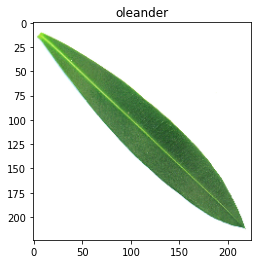

In [ ]:
id = np.random.randint(1942)
pred = model.predict(tf.reshape(images[id],(1,224,224,3)))
plt.figure()
plt.imshow(images[id])
plt.title(categories[list(image_labels[id]).index(1)])


guess = list(pred[0]).index(max(pred[0]))
pred = list(map(int,pred[0]))
print(pred,guess+1)
print("Prediction: " + categories[guess])

Model Finished,Now some extra code that i used to make the csv files

In [ ]:
def transform_img(img):
    return np.asarray(tf.reshape(img,-1))

transformed_images = list(map(transform_img,images))

df = pd.DataFrame()
for i in range(1942):
    df[i] = transformed_images[i]

df1 = pd.DataFrame()
df1["labels"] = image_labels
df.to_csv("/content/drive/MyDrive/Leaves_Dataset.csv")
df1.to_csv("/content/drive/MyDrive/Leaves_Dataset_labels.csv")